##  1. Import libraries required for EDA

In [1]:
# libraries to read the csv and inspeact the dataframe created from csv
import pandas as pd
import numpy as np

#libraries for EDA - Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## 2. Reading the CSV and understanding the data

In [3]:
#Read the CSV

leads = pd.read_csv('Leads.csv')

#maintaining a copy of the dataframe, so that we can do further data handling whlist we have a copy
leads_orig = leads

In [4]:
#let us see the top 5 rows

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#Shape of the leads dataframe
dimension = leads.shape
print('Number of rows in Leads dataframe are ', dimension[0])
print('Number of columns in Leads dataframe are ', dimension[1])

Number of rows in Leads dataframe are  9240
Number of columns in Leads dataframe are  37


In [6]:
#Lets see the further details about columns of this dataframe

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#lets see how the numerlical columns are

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


######  Dropping the duplicates

In [8]:
#Lets first drop duplicate columns if any before analysing null value columns

dimension = leads.shape
print('Number of rows in Leads dataframe before dropping duplicate rows are ', dimension[0])
print('Number of columns in Leads dataframe before dropping duplicate rows are ', dimension[1])


leads.drop_duplicates(subset=None, inplace=True)

print()
print()
dimension = leads.shape
print('Number of rows in Leads dataframe after dropping duplicate rows are ', dimension[0])
print('Number of columns in Leads dataframe after dropping duplicate rows are ', dimension[1])

#they are same as seen below


Number of rows in Leads dataframe before dropping duplicate rows are  9240
Number of columns in Leads dataframe before dropping duplicate rows are  37


Number of rows in Leads dataframe after dropping duplicate rows are  9240
Number of columns in Leads dataframe after dropping duplicate rows are  37


###### Before doing any further analysis lets drop prospect Id and Lead number as they are unique identifiers for a row and
###### add no weightage or insights to our analysis

In [9]:
leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)


## 3. Dropping columns which have null values >= 40%

### Look for null columns and drop those which have values >= 40%

In [10]:
#lets analyze how many columns have null values and to what %

leads_null_columns = (leads.isnull().sum()/len(leads.index))*100
leads_null_columns.sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [11]:
#Inference from above

print('Number of null columns having null % between 20 and 30 are ', len(leads_null_columns[(leads_null_columns >= 20) & (leads_null_columns <= 30)]))
print('Number of null columns having null % between 30 and 40 are ', len(leads_null_columns[(leads_null_columns >= 30) & (leads_null_columns < 40)]))
print('Number of null columns having null >= 40% are ', len(leads_null_columns[(leads_null_columns >= 40)]))

#There are a total of 5 columns with null values greater than 45%

Number of null columns having null % between 20 and 30 are  5
Number of null columns having null % between 30 and 40 are  1
Number of null columns having null >= 40% are  5


## Impute columns that have 'Select' 

####  Before dropping null columns having >= 40 % null values, lets first analyze the "Select" value for categorical variables and how much they constitute to take care of the point mentioned in problem statement

In [12]:
#Getting categorical clumns which have "Select" as a value.

categorical_column_with_select_value=[]
for column in leads.columns:
    if len(leads[column].isin(['Select']).unique())>1:   
        categorical_column_with_select_value.append(column)
print(categorical_column_with_select_value)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


###### It is clear that for above columns leads have left the option as "Select" without choosing any value.

In [13]:
# 1. Lets analyze what percentage of the above columns have Select as value
# 2. Impute select with Nan as we do not know what the actual value for the user is if 'Select' % is high


for categorical_column in categorical_column_with_select_value:
    print('"',categorical_column, '" column has', leads[[categorical_column]].value_counts(normalize=True)['Select']*100, 'Select values')




" Specialization " column has 24.891053576006154 Select values
" How did you hear about X Education " column has 71.70482013365562 Select values
" Lead Profile " column has 63.481855764813965 Select values
" City " column has 28.759590792838875 Select values


###### Impute select values with NaN and then drop columns having null values >= 45%

In [14]:
#Lets impute "Select" values with NaN

leads[categorical_column_with_select_value] = leads[categorical_column_with_select_value].replace('Select', np.nan)


In [15]:
#Now lets analyze null percentage again and drop columns having > 45% null values

leads_null_columns_after_select_imputation = (leads.isnull().sum()/len(leads.index))*100
print('Number of null columns having null % between 20 and 30 are ', len(leads_null_columns_after_select_imputation[(leads_null_columns_after_select_imputation >= 20) & (leads_null_columns_after_select_imputation <= 30)]))
print('Number of null columns having null % between 30 and 40 are ', len(leads_null_columns_after_select_imputation[(leads_null_columns_after_select_imputation >= 30) & (leads_null_columns_after_select_imputation < 40)]))
print('Number of null columns having null >= 40% are ', len(leads_null_columns_after_select_imputation[(leads_null_columns_after_select_imputation >= 40)]))


Number of null columns having null % between 20 and 30 are  3
Number of null columns having null % between 30 and 40 are  3
Number of null columns having null >= 40% are  7


###### We clearly see that after imputing Select with NaN number of columns having null values >= 40 % increased from 5 to 7. Lets drop these columns

In [16]:
#Columns having gte 40% null values

columns_with_gte_40_pct_null_values = leads_null_columns_after_select_imputation[(leads_null_columns_after_select_imputation >= 40)]
columns_with_gte_40_pct_null_values

How did you hear about X Education    78.463203
Lead Quality                          51.590909
Lead Profile                          74.188312
Asymmetrique Activity Index           45.649351
Asymmetrique Profile Index            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Profile Score            45.649351
dtype: float64

In [17]:
leads.drop(columns_with_gte_40_pct_null_values.keys(), axis=1, inplace=True)
((leads.isnull().sum()/len(leads.index))*100).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Lead Origin                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.0000

## 3. Missing(null) value treatment and Dropping columns 

### 3.1 Numerical Columns - Missing value tratement and dropping of columns that are not useful for analysis

In [18]:
#Numeric columns list

numeric_columns = leads.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [19]:
leads[numeric_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Converted                    9240 non-null   int64  
 1   TotalVisits                  9103 non-null   float64
 2   Total Time Spent on Website  9240 non-null   int64  
 3   Page Views Per Visit         9103 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 360.9 KB


######  It is clear that Converted and Total Time Spent on Website have 0 null values.
###### TotalVisits and  Page Views Per Visit  have total 9240-9103 = 137 missing values that accounts to just  1.482% missing values so we wil  perform only imputation for these columns 
###### Before replacing missing values let us analyze the spread of numerical columns , see if it has outliers  and then decide on what to use for missing values -> mean or median.

In [20]:
#Converted is our target column and hence will be exempt from EDA. However, we will just do a sanity check that unique values are
# only 0 and 1.
leads['Converted'].unique()

array([0, 1], dtype=int64)

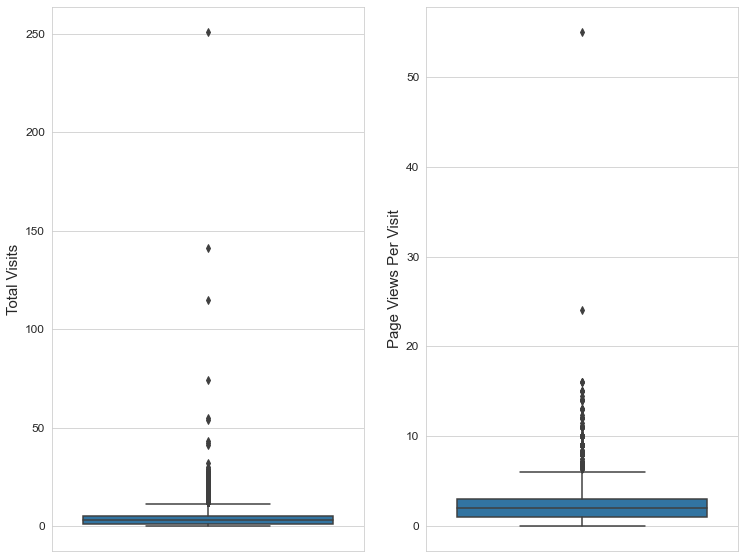

In [21]:
# Build boxplot of all numerical variables except Target
# Build boxplot of all numerical variables 

sns.set_style("whitegrid")

plt.figure(figsize=(19, 10))
plt.subplot(1,3,1)
tv = sns.boxplot(y = 'TotalVisits', data = leads)
tv.set_ylabel("Total Visits",fontsize=15)
tv.tick_params(labelsize=12)

plt.subplot(1,3,2)
pvpv = sns.boxplot(y = 'Page Views Per Visit', data = leads)
pvpv.set_ylabel("Page Views Per Visit",fontsize=15)
pvpv.tick_params(labelsize=12)
plt.show()

######  lets analyze the percentiles

In [22]:
#Checking the detailed percentile values
leads[['TotalVisits','Page Views Per Visit']].describe(percentiles=[0.05,.10,.25,.50,.75,.90,.95,.99])

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
5%,0.000000,0.000000
10%,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
90%,7.000000,5.000000


###### We will replace null values in  TotalVisits and Page Views Per Visit  with their median values as there are outliers as can be seen in percentiles table and box plot

In [23]:
#Also since now we have a better understadning of numerical data, since there are outliers and we are only capping but not deleting
#them we wil replace null values for TotalVisits and Page Views Per Visit  with median

leads['TotalVisits'].fillna(leads['TotalVisits'].median(), inplace=True)
print('number of null values in TotalVisits columns', leads['TotalVisits'].isnull().sum())

leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median(), inplace=True)
print('number of null values in Page Views Per Visit columns', leads['Page Views Per Visit'].isnull().sum())

number of null values in TotalVisits columns 0
number of null values in Page Views Per Visit columns 0


In [24]:
#Now lets again check for null values.

leads[numeric_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Converted                    9240 non-null   int64  
 1   TotalVisits                  9240 non-null   float64
 2   Total Time Spent on Website  9240 non-null   int64  
 3   Page Views Per Visit         9240 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 360.9 KB


###### From above we can conclude that all null values are handled for numeric columns

### 3.2 Categorical  Columns 


#### 1. dropping of columns that are not useful for analysis -  >=  90% values
#### 2.  Null value tratement 
#### 3. Merging columns that have significantly less values into one column

### Dropping of columns


#####  Lets drop categorical columns that have only 1 value because they will result in a skewed analysis if not dropped and as well it will reduce the number of columns we have to analyze further

#####  Lets drop categorical columns that have >= 90% values that belong to 1 category because they will result in a skewed analysis if not dropped and as well it will reduce the number of columns we have to analyze further

In [25]:
categorical_columns = leads.select_dtypes(include=['object']).columns.tolist()
columns_having_1_category_gte_90_pct = []
for column in categorical_columns:
    if((leads[column].value_counts(dropna=False,normalize=True)*100)[0] >= 90):
        columns_having_1_category_gte_90_pct.append(column)
        
print('Number of  columns having >= 90% values in one category are :', len(columns_having_1_category_gte_90_pct))
print()
print('columns having >= 90% values in one category are :', columns_having_1_category_gte_90_pct) 
print()
dimension = leads.shape
print('Number of columns in Leads dataframe before dropping columns having >= 90% values in one categor are ', dimension[1])
print()
leads.drop(columns_having_1_category_gte_90_pct,1,inplace = True)   
dimension = leads.shape
print('Number of columns in Leads dataframe after dropping columns having >= 90% values in one categor columns are ', dimension[1])

Number of  columns having >= 90% values in one category are : 13

columns having >= 90% values in one category are : ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']

Number of columns in Leads dataframe before dropping columns having >= 90% values in one categor are  28

Number of columns in Leads dataframe after dropping columns having >= 90% values in one categor columns are  15


###  Replace null values with mode/'Not Specified' for categorical columns and merging columns

In [26]:
categorical_columns = leads.select_dtypes(include=['object']).columns.tolist()
null_columns = []
for column in categorical_columns:
    if(((leads[column].isnull().sum() / leads.shape[0]) * 100) > 0):
        null_columns.append(column)
null_columns

['Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'City']

#####  'Lead Source' Imputation and merging of columns

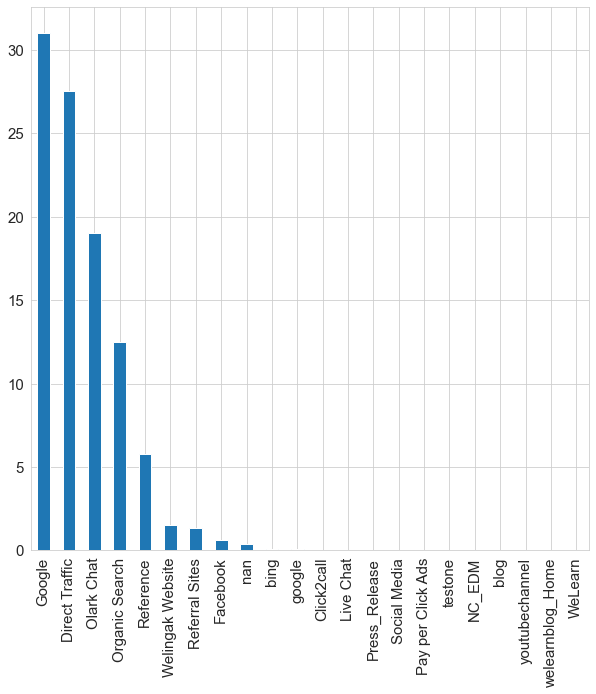

In [27]:
plt.figure(figsize=[10,10])
ax1 = (leads['Lead Source'].value_counts(dropna=False,normalize=True)*100).plot(kind='bar')
ax1.tick_params(axis='both', labelsize=15)
plt.show()

In [28]:
## Since Google has the highest value and Nan is very small in comaprison we will replace Nan with Google
leads['Lead Source'].fillna(leads['Lead Source'].mode()[0], inplace=True)

## Merging of columns ->
leads['Lead Source'] = leads['Lead Source'].replace(['bing', 'google', 'Click2call', 'Live Chat', 'Social Media', 
'Press_Release', 'NC_EDM', 'testone', 'WeLearn', 'welearnblog_Home', 'youtubechannel', 'Pay per Click Ads', 'blog'], 'Other_Sources')

#####  'Last Activity' Imputation and merging of columns

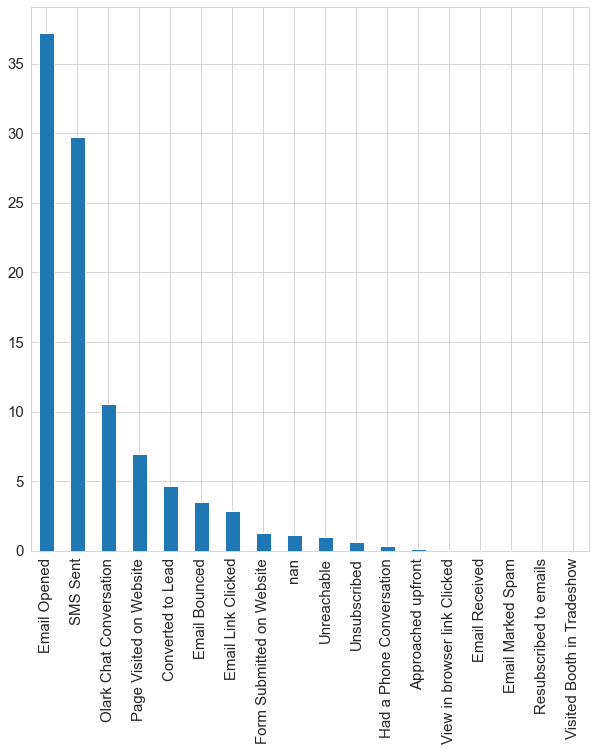

In [29]:
plt.figure(figsize=[10,10])
ax1 = (leads['Last Activity'].value_counts(dropna=False,normalize=True)*100).plot(kind='bar')
ax1.tick_params(axis='both', labelsize=15)
plt.show()

In [30]:
## Since Email opened has the highest value and Nan is very small in comaprison we will replace Nan with Email Opened
leads['Last Activity'].fillna(leads['Last Activity'].mode()[0], inplace=True)

## Merging of columns ->
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 
                        'Approached upfront', 'View in browser link Clicked', 'Email Received', 
                        'Email Marked Spam', 'Visited Booth in Tradeshow', 'Resubscribed to emails'], 'Other_Activity')

#####  'Country' Imputation and merging of columns

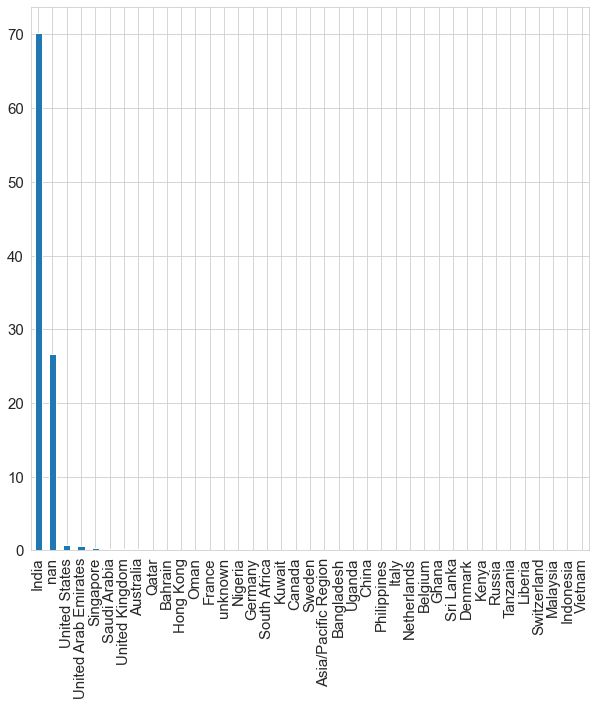

In [31]:
plt.figure(figsize=[10,10])
ax1 = (leads['Country'].value_counts(dropna=False,normalize=True)*100).plot(kind='bar')
ax1.tick_params(axis='both', labelsize=15)
plt.show()

In [32]:
## Since Email opened has the highest value and Nan is very small in comaprison we will replace Nan with Email Opened
leads['Country'].fillna(leads['Country'].mode()[0], inplace=True)

## Merging of columns ->
leads['Country'] = leads['Country'].replace(['United States', 'United Arab Emirates', 'Singapore', 'Saudi Arabia', 
    'United Kingdom', 'Australia', 'Qatar', 'Bahrain', 'Hong Kong', 'Oman', 'France', 'unknown', 'Canada',
    'Nigeria', 'South Africa', 'Kuwait', 'Germany', 'Sweden', 'Uganda', 'Bangladesh', 'Italy', 
    'Asia/Pacific Region', 'Netherlands', 'Ghana', 'Belgium', 'China', 'Philippines', 'Russia', 
    'Malaysia', 'Tanzania', 'Switzerland', 'Denmark', 'Indonesia', 'Sri Lanka', 'Kenya', 'Vietnam', 'Liberia'], 'Other_Countries')

#####  'Specialization' Imputation and merging of columns


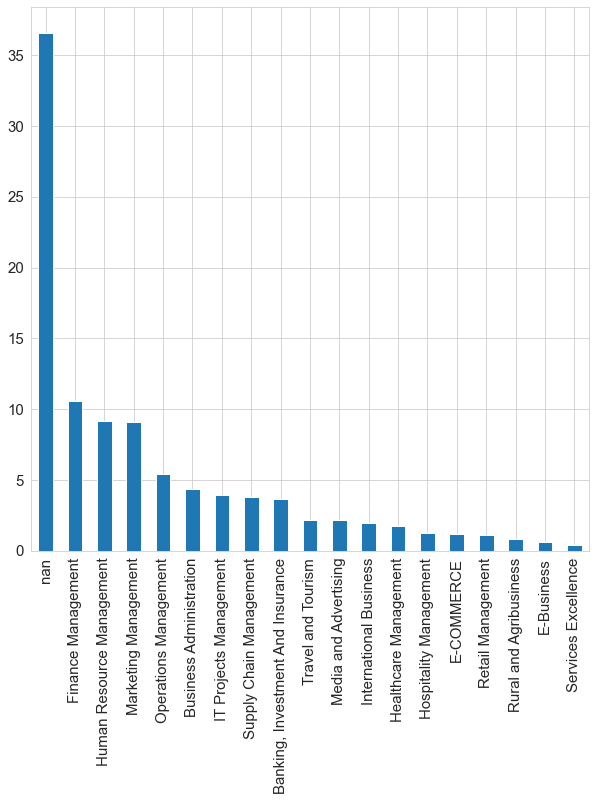

In [33]:
plt.figure(figsize=[10,10])
ax1 = (leads['Specialization'].value_counts(dropna=False,normalize=True)*100).plot(kind='bar')
ax1.tick_params(axis='both', labelsize=15)
plt.show()

In [34]:
## Since Nan has the highest value we will replace it with 'Not Specified'
leads['Specialization'].fillna('Not Specified', inplace=True)


#####  'What is your current occupation' Imputation and merging of columns

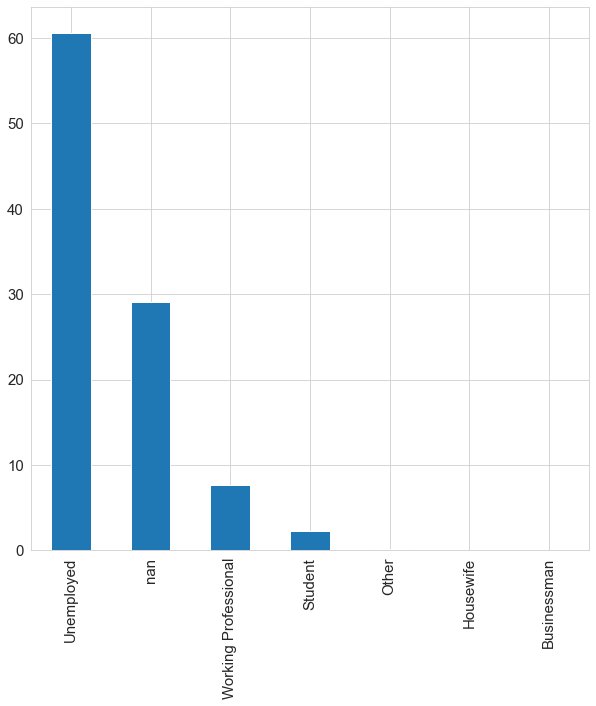

In [35]:
plt.figure(figsize=[10,10])
ax1 = (leads['What is your current occupation'].value_counts(dropna=False,normalize=True)*100).plot(kind='bar')
ax1.tick_params(axis='both', labelsize=15)
plt.show()


In [36]:
## Since NaN values are significantly high we will replace it with 'Not_Specified'
leads['What is your current occupation'].fillna('Not_Specified', inplace=True)

#####  'What matters most to you in choosing a course' Imputation and merging of columns


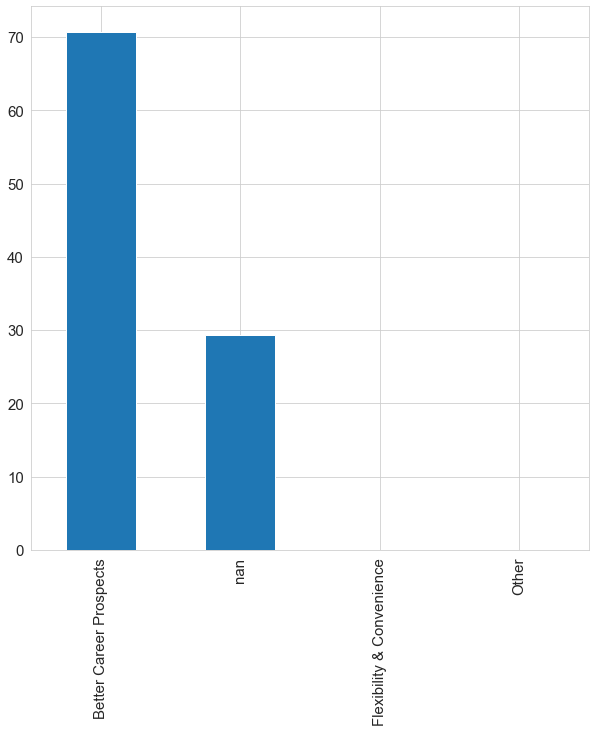

In [37]:
plt.figure(figsize=[10,10])
ax1 = (leads['What matters most to you in choosing a course'].value_counts(dropna=False,normalize=True)*100).plot(kind='bar')
ax1.tick_params(axis='both', labelsize=15)
plt.show()


In [38]:
## Since Nan has the highest value we will replace it with 'Not Specified'
leads['What matters most to you in choosing a course'].fillna(leads['What matters most to you in choosing a course'].mode()[0], inplace=True)

## Merging of columns ->
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(['Flexibility & Convenience', 'Other'], 'Other_Reasons')


In [39]:
(leads['What matters most to you in choosing a course'].value_counts(dropna=False,normalize=True)*100).index.to_list()

['Better Career Prospects', 'Other_Reasons']

#####  'Tags' Imputation and merging of columns


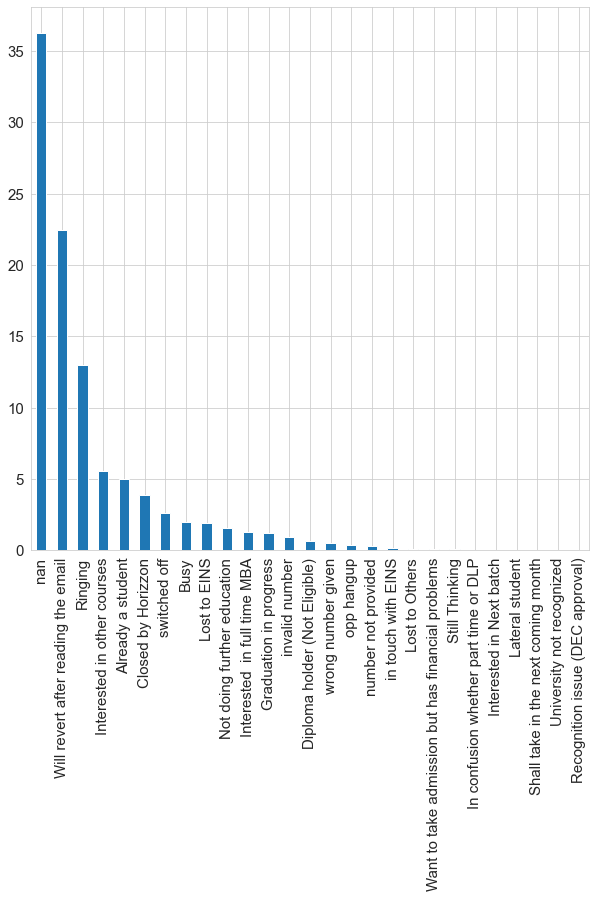

In [40]:

plt.figure(figsize=[10,10])
ax1 = (leads['Tags'].value_counts(dropna=False,normalize=True)*100).plot(kind='bar')
ax1.tick_params(axis='both', labelsize=15)
plt.show()

In [41]:
print((leads['Tags'].value_counts(dropna=False,normalize=True)*100).index.to_list())

[nan, 'Will revert after reading the email', 'Ringing', 'Interested in other courses', 'Already a student', 'Closed by Horizzon', 'switched off', 'Busy', 'Lost to EINS', 'Not doing further education', 'Interested  in full time MBA', 'Graduation in progress', 'invalid number', 'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup', 'number not provided', 'in touch with EINS', 'Lost to Others', 'Want to take admission but has financial problems', 'Still Thinking', 'In confusion whether part time or DLP', 'Interested in Next batch', 'Lateral student', 'Shall take in the next coming month', 'University not recognized', 'Recognition issue (DEC approval)']


In [42]:
## Since Nan has the highest value we will replace it with 'Not Specified'
leads['Tags'].fillna('Not Specified', inplace=True)

## Merging of columns ->
leads['Tags'] = leads['Tags'].replace(['Lost to EINS', 'Not doing further education', 'Interested  in full time MBA', 
                'Graduation in progress', 'invalid number', 'Diploma holder (Not Eligible)', 'wrong number given', 
                'opp hangup', 'number not provided', 'in touch with EINS', 'Lost to Others', 
                'Want to take admission but has financial problems', 'Still Thinking', 
                'In confusion whether part time or DLP', 'Interested in Next batch', 'Lateral student', 
                'University not recognized', 'Shall take in the next coming month', 'Recognition issue (DEC approval)'], 'Other_Tags')


#####  'City' Imputation and merging of columns


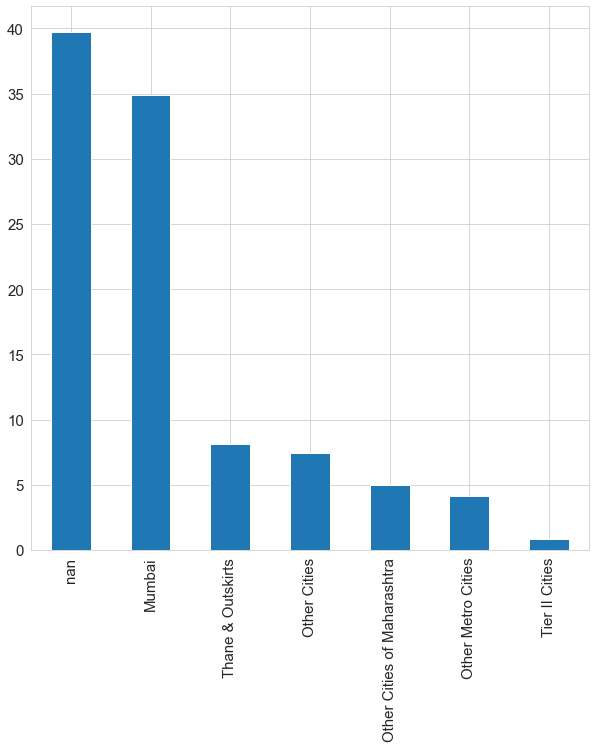

In [43]:
plt.figure(figsize=[10,10])
ax1 = (leads['City'].value_counts(dropna=False,normalize=True)*100).plot(kind='bar')
ax1.tick_params(axis='both', labelsize=15)
plt.show()

In [44]:
## Since Nan has the highest value we will replace it with 'Not Specified'
leads['City'].fillna('Not Specified', inplace=True)

In [45]:
leads_null_columns_after_select_imputation = (leads.isnull().sum()/len(leads.index))*100
columns_with_gte_40_pct_null_values = leads_null_columns_after_select_imputation[(leads_null_columns_after_select_imputation >= 40)]
leads.drop(columns_with_gte_40_pct_null_values.keys(), axis=1, inplace=True)

In [46]:
categorical_columns = leads.select_dtypes(include=['object']).columns.tolist()
columns_having_1_category_gte_90_pct = []
for column in categorical_columns:
    if((leads[column].value_counts(dropna=False,normalize=True)*100)[0] >= 90):
        columns_having_1_category_gte_90_pct.append(column)
        
print('Number of  columns having >= 90% values in one category are :', len(columns_having_1_category_gte_90_pct))
print()
print('columns having >= 90% values in one category are :', columns_having_1_category_gte_90_pct) 
print()
dimension = leads.shape
print('Number of columns in Leads dataframe before dropping columns having >= 90% values in one categor are ', dimension[1])
print()
leads.drop(columns_having_1_category_gte_90_pct,1,inplace = True)   
dimension = leads.shape
print('Number of columns in Leads dataframe after dropping columns having >= 90% values in one categor columns are ', dimension[1])

Number of  columns having >= 90% values in one category are : 2

columns having >= 90% values in one category are : ['Country', 'What matters most to you in choosing a course']

Number of columns in Leads dataframe before dropping columns having >= 90% values in one categor are  15

Number of columns in Leads dataframe after dropping columns having >= 90% values in one categor columns are  13


In [47]:
#lets check the shape again
dimension = leads.shape
print('Number of rows in Leads dataframe are ', dimension[0])
print('Number of columns in Leads dataframe are ', dimension[1])

Number of rows in Leads dataframe are  9240
Number of columns in Leads dataframe are  13


In [48]:
leads.select_dtypes(include=['object','number']).columns.tolist()

['Lead Origin',
 'Lead Source',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

###### We have total 13 columns and 9240 rows.

###### Lets rename lengthy column names to meaningful short names

In [49]:
leads.rename(columns={'What is your current occupation': 'Occupation', 
                     'A free copy of Mastering The Interview': 'Free Interview Study Copy'                   
                    },inplace = True)

###### Thus we have reduced the number of columns to 13 and also have imputed such that there are no null values. Hence can proceed to check data imblance and univariate and bivariate analysis

In [50]:
leads.select_dtypes(include=['object']).columns.tolist()

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'Occupation',
 'Tags',
 'City',
 'Free Interview Study Copy',
 'Last Notable Activity']

## 4. Checking for Data Imblanace

In [51]:
data_imbalance = (leads['Converted'].value_counts()/leads.shape[0])*100
data_imbalance

0    61.461039
1    38.538961
Name: Converted, dtype: float64

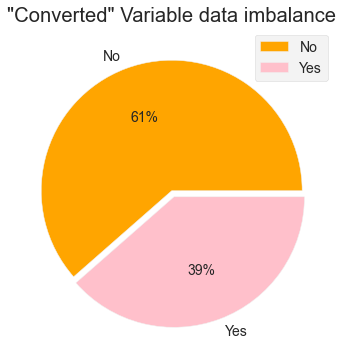

In [52]:
plt.figure(figsize=[20,6])
plt.style.use('fivethirtyeight')
plt.pie(leads['Converted'].value_counts(),autopct='%1.0f%%',labels=['No','Yes'],                                                explode=(0,0.05),colors = ['Orange','Pink'])
plt.title('"Converted" Variable data imbalance')
plt.legend()
plt.show()

### 4.1 Univariate Categorical Analysis

In [53]:
categorical_columns = leads.select_dtypes(exclude=['number']).columns.tolist()
print('Number of categorical columns ara ', len(categorical_columns))
categorical_columns

Number of categorical columns ara  9


['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'Occupation',
 'Tags',
 'City',
 'Free Interview Study Copy',
 'Last Notable Activity']

######  Dataset has the above categorical columns

#### Below is a common fucntion to plot categorical variable

In [54]:
def plot_cc(df,columnName,title,rotation) :
    
    sns.despine 
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    
    perc_defaulted = df[[columnName, 'Converted']].groupby([columnName],as_index=False).mean()
    perc_defaulted["Converted"] = perc_defaulted["Converted"]*100
    perc_defaulted.sort_values(by='Converted', ascending=False, inplace=True)
    
    ax1= sns.countplot(x = columnName, data=df,hue='Converted',order=df[columnName].value_counts().index)
    ax1.set_title(f'{title} count', fontsize = 15, weight='bold')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')
    ax1.set_ylabel('Count', fontsize=15,weight='bold')
    ax1.set_xlabel(columnName, fontsize=15,weight='bold')
    ax1.legend(['Non Converted','Converted'],loc = "upper right")
     
    plt.subplot(1,2,2)
    ax2=sns.barplot(data = df, x = columnName, y = 'Converted',order = perc_defaulted[columnName],ci=None)
    plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
    ax2.set_title(f'Converted % for {title}', fontsize = 15,weight='bold')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha='right')
    ax2.set_xlabel(columnName, fontsize=15,weight='bold')
    ax2.set_ylabel('Converted percentage', fontsize=15,weight='bold')

    ax1.tick_params(axis='both', labelsize=15)
    ax2.tick_params(axis='both', labelsize=15)
    
    
    bars = ax1.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]
    
    for left, right in zip(left_bars, right_bars):
            height_l = left.get_height()
            height_r = right.get_height()
            total = height_l + height_r
            
            
            ax1.annotate('{0}'.format(height_l), (left.get_x() + left.get_width()/2., height_l),
                    ha='center', va='bottom',
                    color= 'black',rotation=rotation)
            ax1.annotate('{0}'.format(height_r), (right.get_x() + left.get_width()/2., height_r),
                    ha='center', va='bottom',
                    color= 'black',rotation=rotation)
            
    bars_2 = ax2.patches
    half2 = int(len(bars_2)/2)
    left_bars = bars_2[:half2]
    right_bars = bars_2[half2:]
    
    for left, right in zip(left_bars, right_bars):
            height_l = left.get_height()
            height_r = right.get_height()
            total = height_l + height_r

            #ax2.text(left.get_x() + left.get_width()/2., height_l,'{0:.0%}'.format(height_l), ha="center")
            #ax2.text(right.get_x() + right.get_width()/2., height_r, '{0:.0%}'.format(height_r), ha="center")
            
            ax2.annotate('{0:.0%}'.format(height_l), (left.get_x() + left.get_width()/2., height_l),
                    ha='center', va='bottom',
                    color= 'black',rotation=rotation)
            ax2.annotate('{0:.0%}'.format(height_r), (right.get_x() + left.get_width()/2., height_r),
                    ha='center', va='bottom',
                    color= 'black',rotation=rotation)
            
            
            
    
    
    plt.tight_layout()
    plt.show()

###### Lead Origin

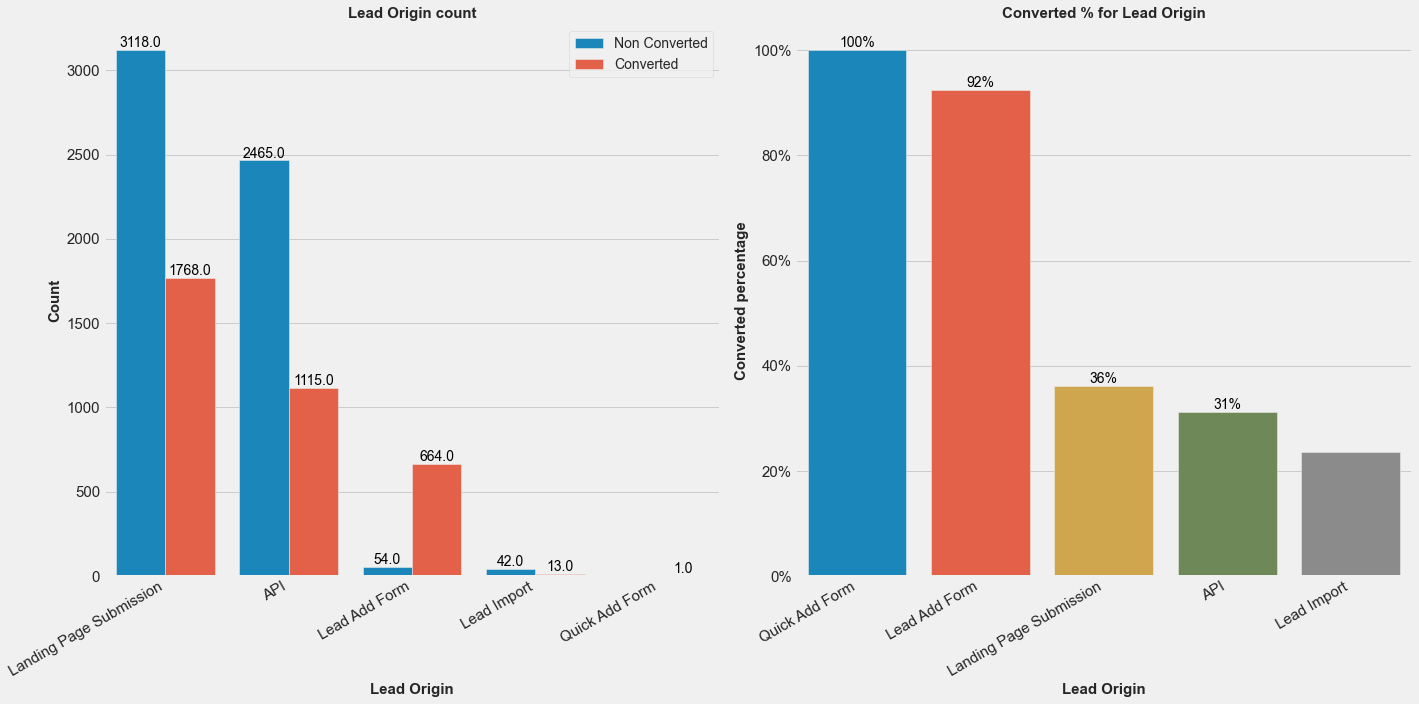

In [55]:
plot_cc(leads,'Lead Origin','Lead Origin',0)

######  Inferences from 'Lead Origin' graphs
**1. Quick Add Form has the least count but it got converted 100%**

**2. Lead Add Form has only 718 entries but it has the second highest conversion rate of about 92%**

**3. Landing Page submission has the highest number but it is third in conversion rate about 36%**

**4. API design is second highest number of lead origins but its conversion rate is only aout 31%**

######  Insights

**1. More leads should be generated from quick add form and lead add form as lead origins. These should be heavily used**

**2. But since number of lead origina are highest in Landing page submission and API, lead conversion from these origins should be improved**


###### Lead Source

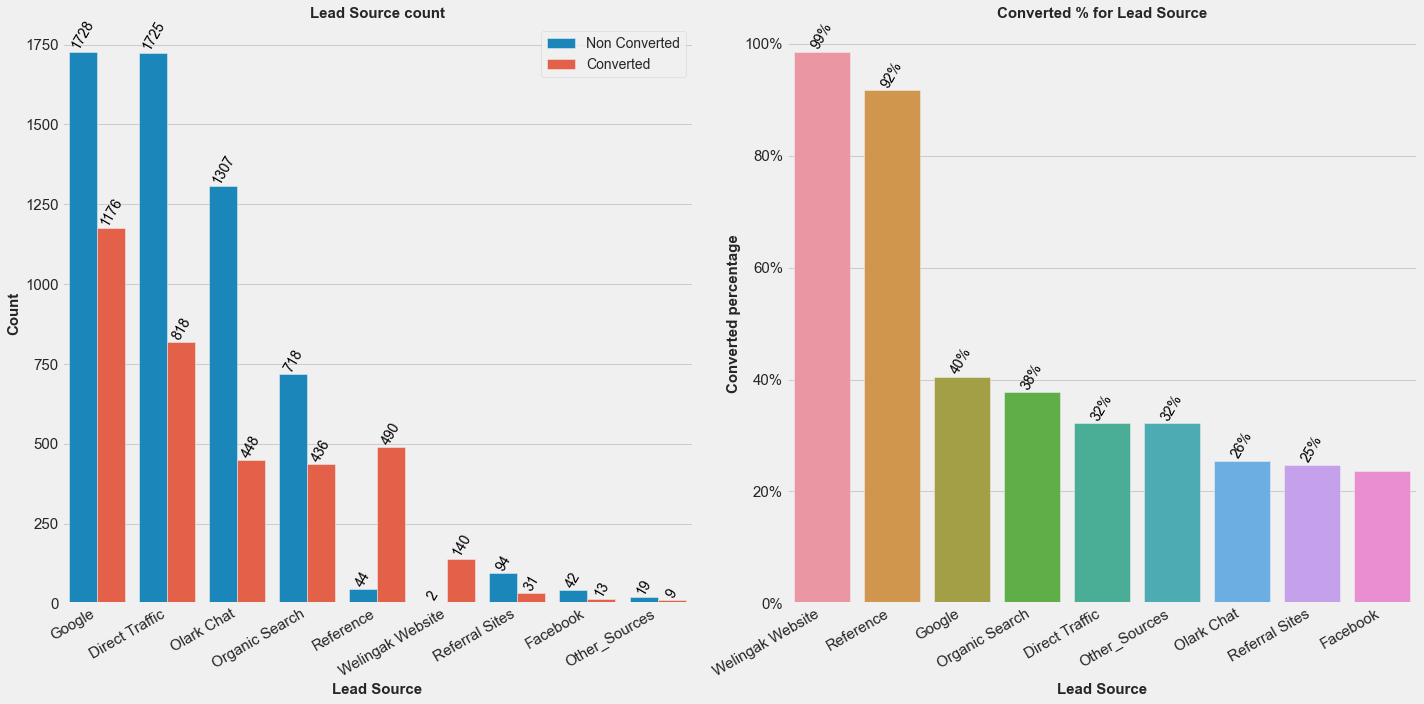

In [56]:
plot_cc(leads,'Lead Source','Lead Source',60)

######  Inferences from 'Lead Source' graphs
**1. NC_EDM, WeLearn, LiveChat have 100% conversion rate though they are the least in number.**


**2. Google has the highest count and a conversion rate of about 40%**


**3. Direct Traffic, Olark Chat, Organic Search are higher in number of all the sources but their conversion rate is 32%,26% 
and 36% respectively**


**4. Welingak website accounts to only 142 leads but their conversion is 99%**


**5. There are total 534 references and the conversion rate is 92%**




######  Insights

**1. Existing or past students/customers should be actively involved to give reference as references has a high conversion rate of about 92%**

**2. Just 142 leads are from Welingak wesbite and they have 99% conversion rate - so definitely this source should be given weightage**




###### Last Activity

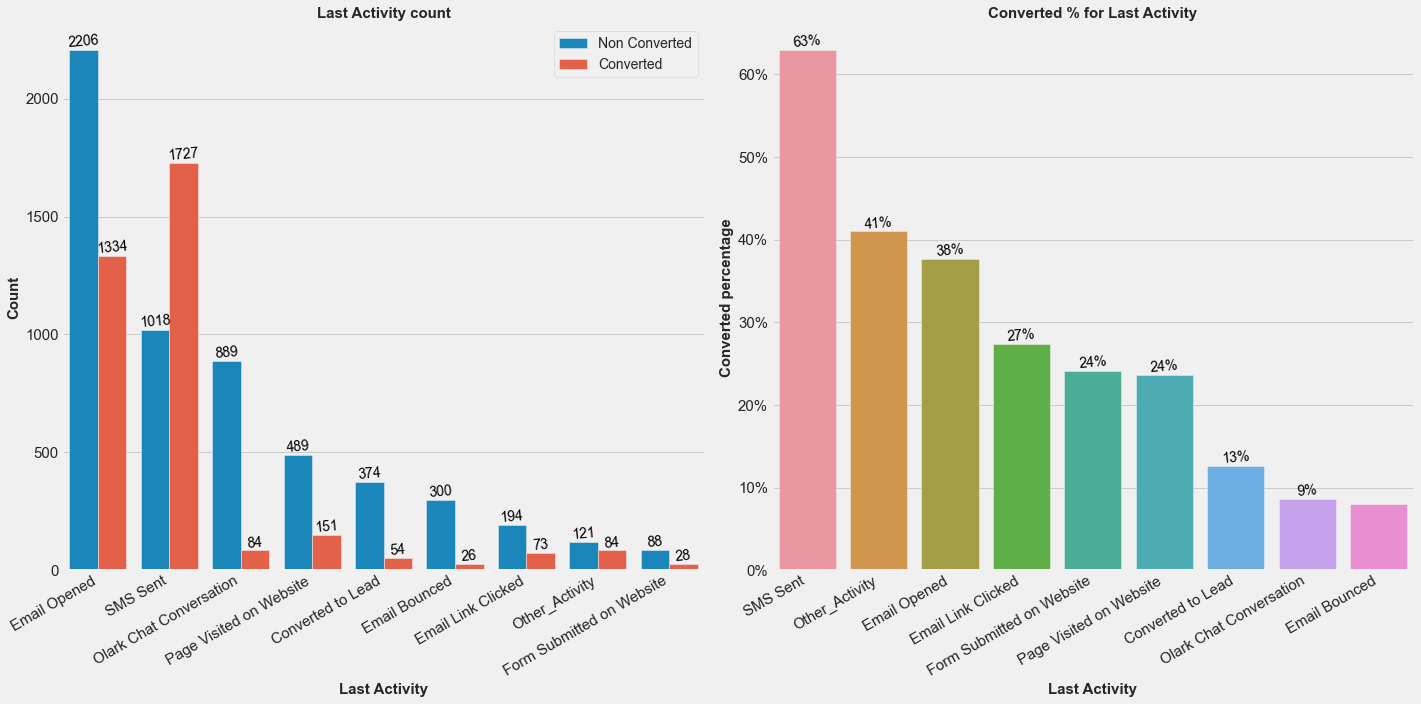

In [57]:
plot_cc(leads,'Last Activity','Last Activity',5)

######  Inferences from 'Last Activity' graphs

**1. Email opened is highest in count and its convertion rate is about 38%**


**2. SMS sent issecond  highest in count and its convertion rate is about 63%**


**3. 'Approached Upfront' has just 9 in count but has 100% convertion rate**


**4. Though Email marked spam has 100% convertion the count is just 2 and we cannot make any inference from this for logical reasons**


**5. All other activities except SMS sent and Email opened do not have much count and hence can be clubbed as one category**




######  Insights

**1. Email opened and SMS sent have a significant convertion rate in comparison to others**



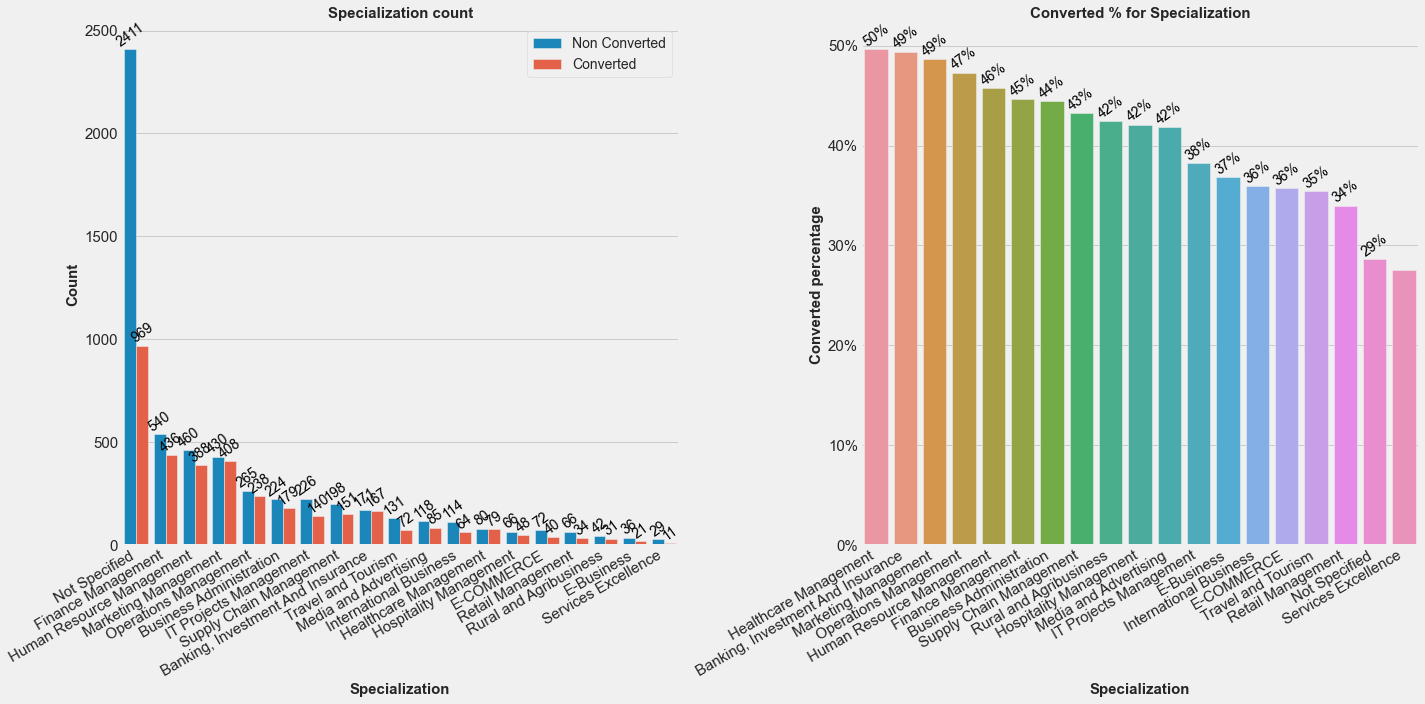

In [58]:
plot_cc(leads,'Specialization','Specialization',36)

###### **Inferences and Insights from 'Specialization' columns**

**1. People whose specialization is 'Not Specified' have the least convertion rate**

**2. Only 159 leads have Healthcare management as specialization but they have the highest convertion rate**

**3. Banking, Insurance and Investment has 338 leads and its convertion rate is about 49%**

**4. Management specializations have higher convertion rates from above graphs -  Marketing Management(838 leads, 49% convertion), Operations Management(538 leads, 47% converrtion), Human Resources Management(848 leads, 46% convertion)**

**5.  Thus, we can say company can reach out to leads from Banking and Management specializations as they have very high convertion ratios**

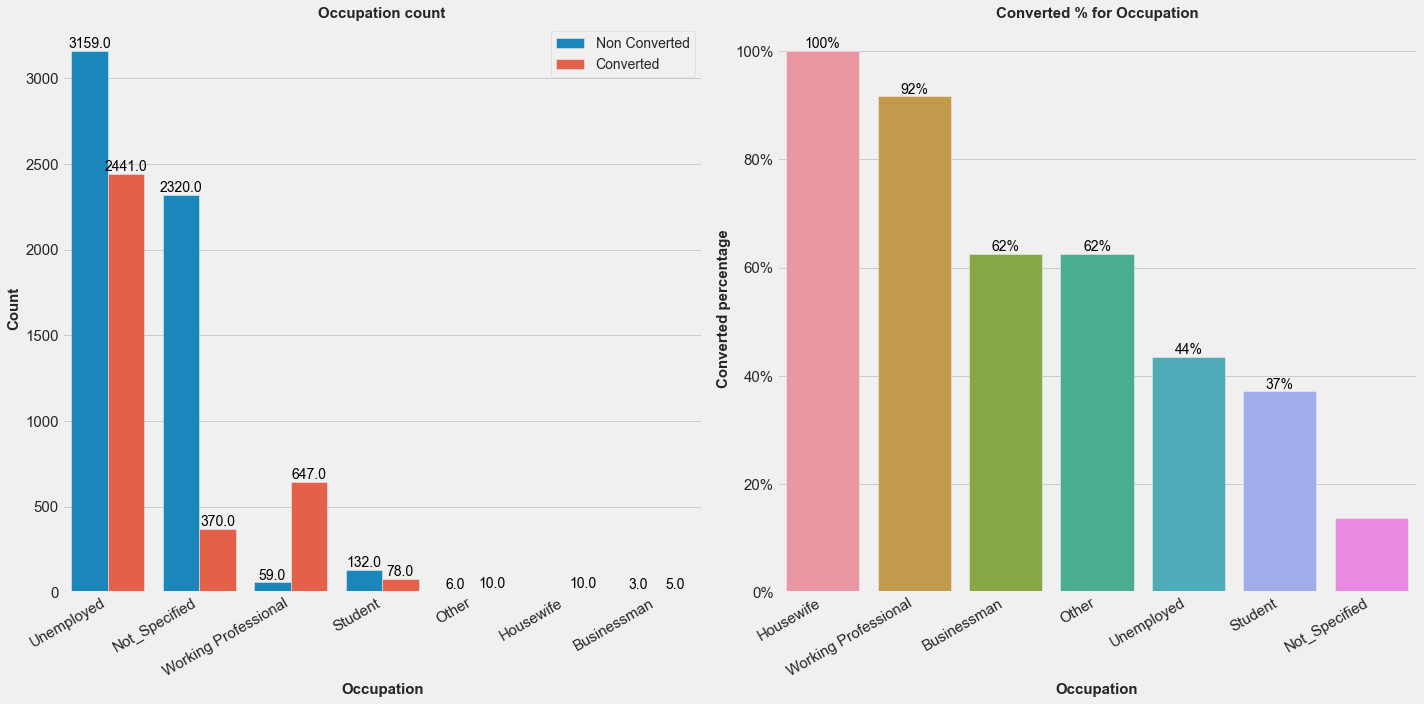

In [59]:
plot_cc(leads,'Occupation','Occupation',0)

###### **Inferences and Insights from 'Occupation' column**

**1. Housewife are the least in count of leads but they have 100% (highest) convertion rate**

**2. Working professional is the third highest count in leads but second highest in convertion rate**

**3. Unemployed count is highest but their convertion rate is about 44%, so may be a discount after proper verification of unemployed status might increase lead convertion rate**

**4. People who do not specify their occupation have the least number of converts so better to concentrate more on leads that specify an occupation type and on those occupations that have high convertion rates like housewife and working professionals**

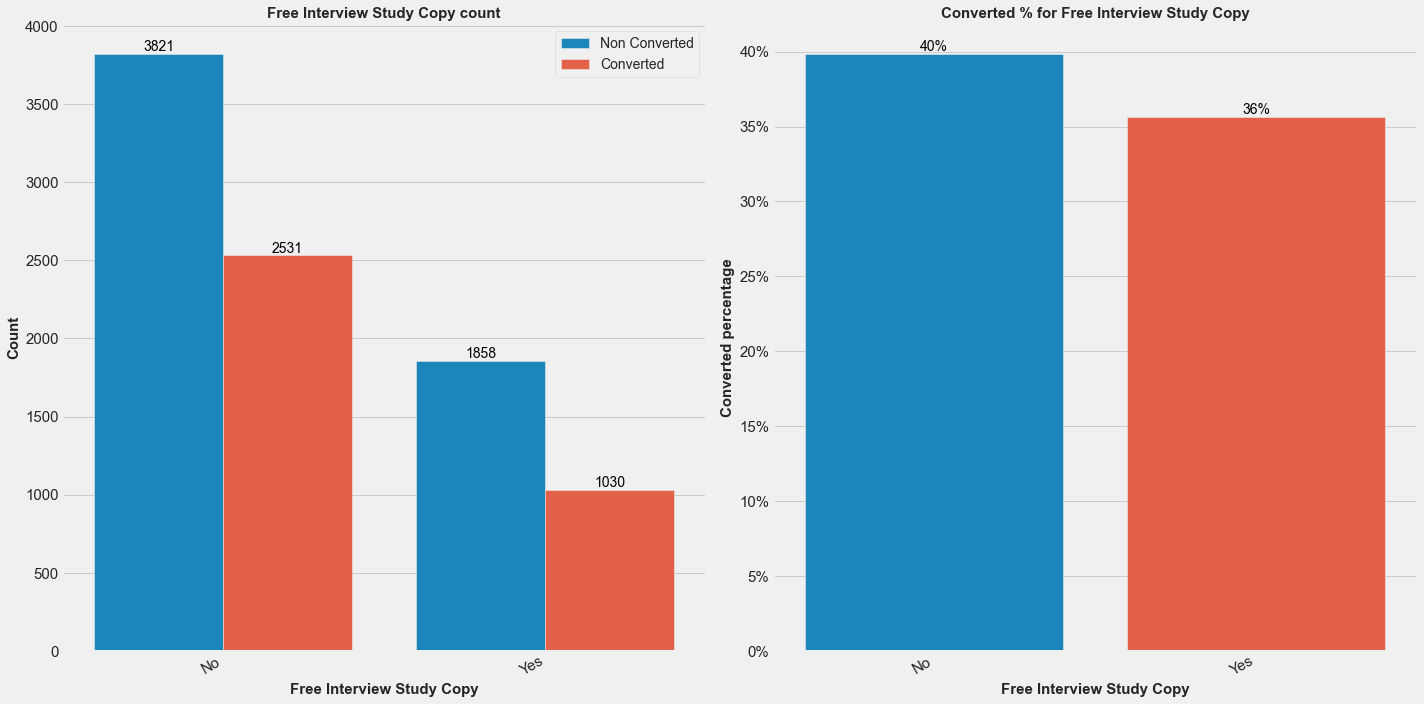

In [60]:
plot_cc(leads,'Free Interview Study Copy','Free Interview Study Copy',0)

###### **Inferences and Insights from 'Free Interview Study Copy' column**

**1. Free interview study copy has no much variation between number of leads that got converted for both its categories. So this will not help in the analysis and can be dropped'**

In [61]:
#drop the 'Free Interview Study Copy' column
leads.drop('Free Interview Study Copy', 1, inplace = True)

### 4.2 Univariate Numerical Analysis


###### Will do univariate analysis for numeric columns.

In [62]:
print('numeric columns to be analyzed are -> ', numeric_columns)

numeric columns to be analyzed are ->  ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


###### Boxplot for numerical columns

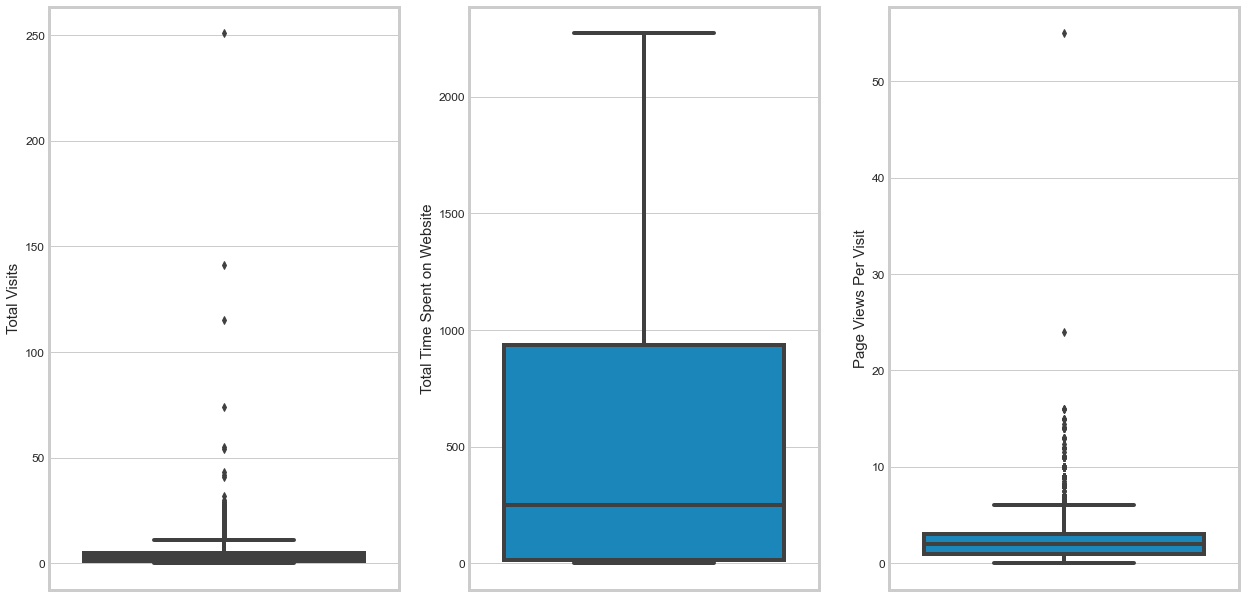

In [63]:
# Build boxplot of all numerical variables except Target
# Build boxplot of all numerical variables 

sns.set_style("whitegrid")

plt.figure(figsize=(19, 10))
plt.subplot(1,3,1)
tv = sns.boxplot(y = 'TotalVisits', data = leads)
tv.set_ylabel("Total Visits",fontsize=15)
tv.tick_params(labelsize=12)
plt.subplot(1,3,2)
tts = sns.boxplot(y = 'Total Time Spent on Website', data = leads)
tts.set_ylabel("Total Time Spent on Website",fontsize=15)
tts.tick_params(labelsize=12)
plt.subplot(1,3,3)
pvpv = sns.boxplot(y = 'Page Views Per Visit', data = leads)
pvpv.set_ylabel("Page Views Per Visit",fontsize=15)
pvpv.tick_params(labelsize=12)
plt.show()

In [64]:
leads[['TotalVisits','Page Views Per Visit']].describe(percentiles=[0.05,.10,.25,.50,.75,.90,.95,.99])

,TotalVisits,Page Views Per Visit
count,9240.000000,9240.000000
mean,3.438636,2.357440
std,4.819024,2.145781
min,0.000000,0.000000
5%,0.000000,0.000000
10%,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
90%,7.000000,5.000000


######  Inferences :
**1. There are outliers in TotalVisits and Page Views Per Visit which needs to be handled**

**2. Total Time Spent on Website has no outliers and the median is below 100**

###### From above we can see that there is a gradual increase in values from 95% to 99%, but from 99% to max, the increase is huge.


In [65]:
print("Total number of rows above 95 percentile for TotalVisits column:",len(leads[leads['TotalVisits'] >= leads['TotalVisits'].quantile(0.95)]))
print("Total number of rows above 95 percentile for Page Views Per Visit column:",len(leads[leads['Page Views Per Visit'] >= leads['Page Views Per Visit'].quantile(0.95)]))


Total number of rows above 95 percentile for TotalVisits column: 467
Total number of rows above 95 percentile for Page Views Per Visit column: 604


In [66]:
print("Total number of rows above 99 percentile for TotalVisits column:",len(leads[leads['TotalVisits'] >= leads['TotalVisits'].quantile(0.99)]))
print("Total number of rows above 99 percentile for Page Views Per Visit column:",len(leads[leads['Page Views Per Visit'] >= leads['Page Views Per Visit'].quantile(0.99)]))


Total number of rows above 99 percentile for TotalVisits column: 99
Total number of rows above 99 percentile for Page Views Per Visit column: 120


In [67]:
#Capping the data at 95% percentile since the number of rows at 95% is  significantly less
leads.loc[leads['TotalVisits'] >= leads['TotalVisits'].quantile(0.95), 'TotalVisits'] = leads['TotalVisits'].quantile(0.95) # outlier capping
leads.loc[leads['Page Views Per Visit'] >= leads['Page Views Per Visit'].quantile(0.95), 'Page Views Per Visit'] = leads['Page Views Per Visit'].quantile(0.95) # outlier capping

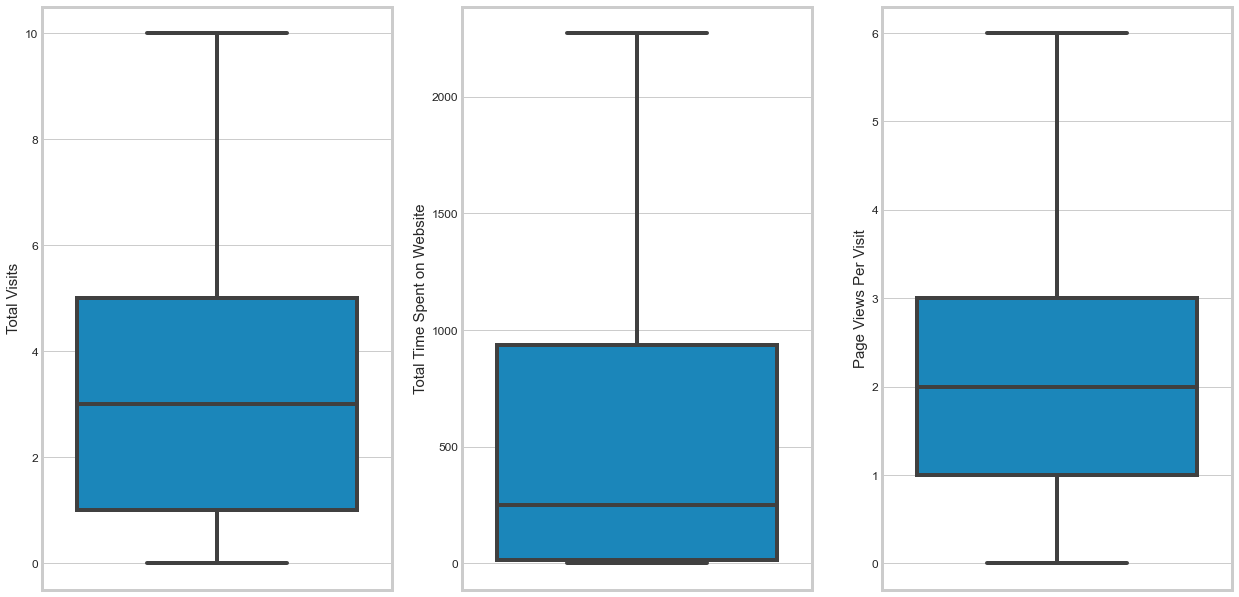

In [68]:
# Build boxplot of all numerical variables except Target
# Build boxplot of all numerical variables 

sns.set_style("whitegrid")

plt.figure(figsize=(19, 10))
plt.subplot(1,3,1)
tv = sns.boxplot(y = 'TotalVisits', data = leads)
tv.set_ylabel("Total Visits",fontsize=15)
tv.tick_params(labelsize=12)
plt.subplot(1,3,2)
tts = sns.boxplot(y = 'Total Time Spent on Website', data = leads)
tts.set_ylabel("Total Time Spent on Website",fontsize=15)
tts.tick_params(labelsize=12)
plt.subplot(1,3,3)
pvpv = sns.boxplot(y = 'Page Views Per Visit', data = leads)
pvpv.set_ylabel("Page Views Per Visit",fontsize=15)
pvpv.tick_params(labelsize=12)
plt.show()

######  As we can above boxplots we have removed outliers for TotalVisits and Page Views Per Visit

### 4.3 Bivariate Numerical Analysis

#####  Heatmap for all numeric variables

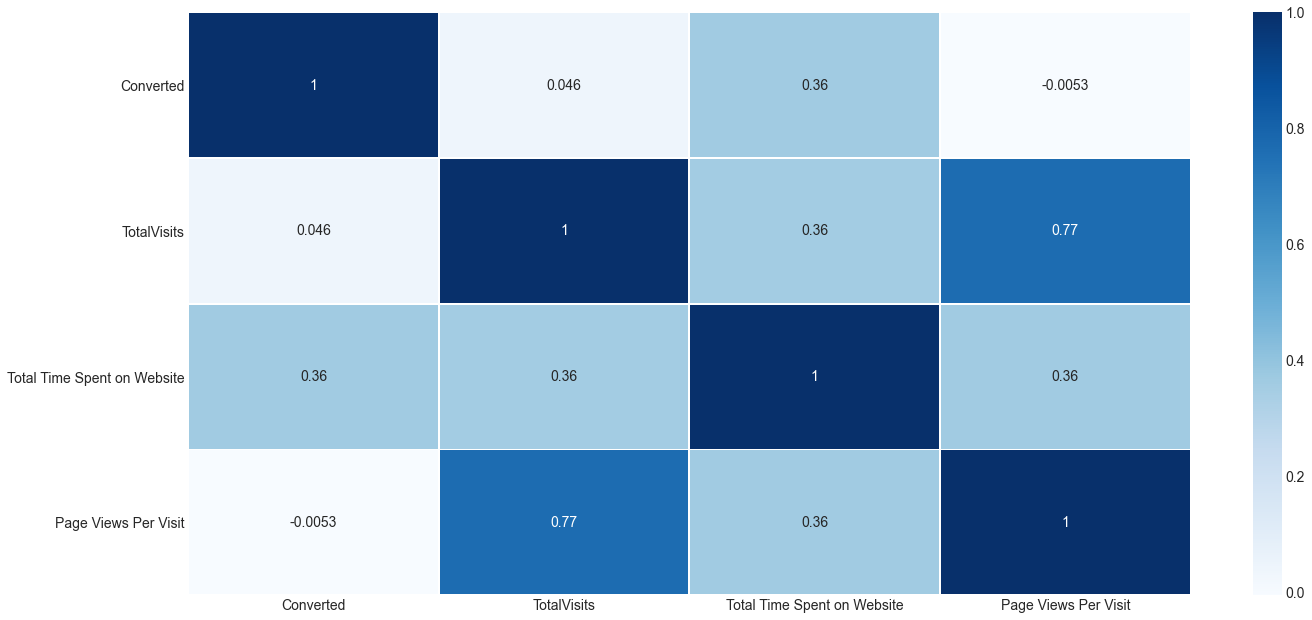

In [69]:
# Looking at the correlation table
plt.figure(figsize = (20,10))
sns.heatmap(leads.corr(), cmap="Blues",annot=True,linewidth =1)
plt.show()

######  Inferences from above heatmap for numeric variables

**1. There is a strong correlation between Total Visits and Page views per visit and hence one of them can be dropped to not have a high VIF value.**

#####  Pairplot for all numeric variables with Converted as a Hue

<Figure size 2160x1080 with 0 Axes>

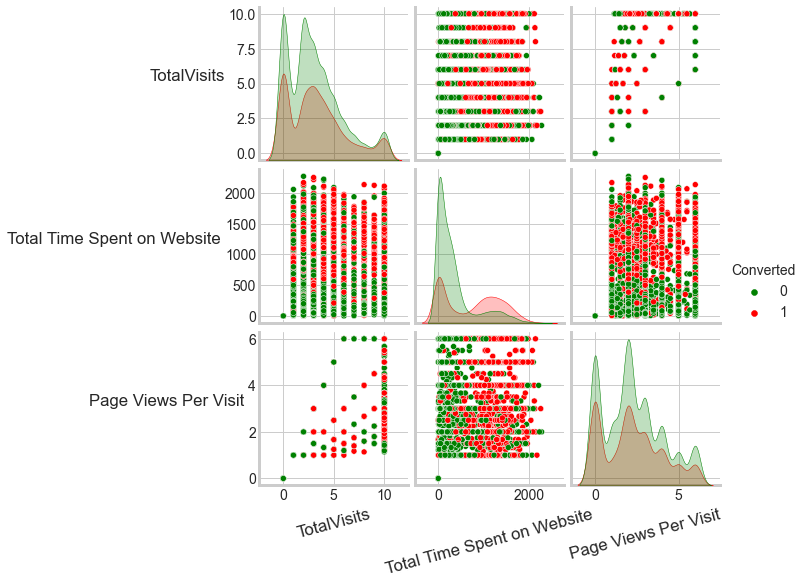

In [70]:
plt.figure(figsize=(30, 15))
ax1 = sns.pairplot(leads[numeric_columns], hue='Converted',palette=["g","r"])
for axes in ax1.axes.flat:
     axes.set_ylabel(axes.get_ylabel(), rotation=0, horizontalalignment='right')
     axes.set_xlabel(axes.get_xlabel(), rotation=15)
plt.show()

#####  Barplot for all numeric variables with Converted as a Hue

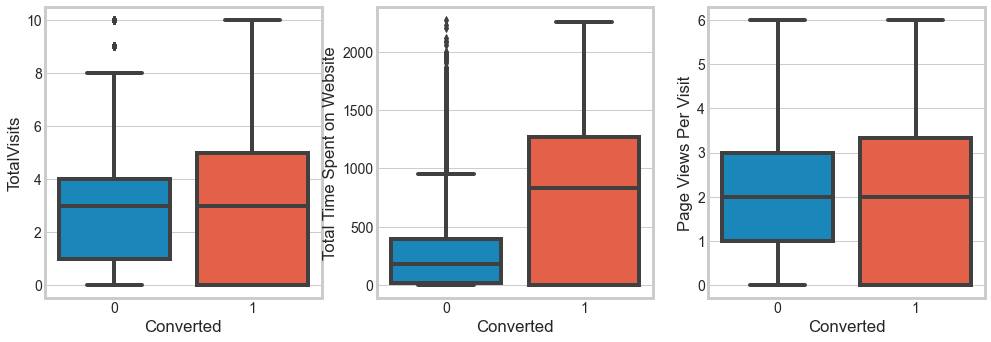

In [71]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.show()

######  Inferences from pair plot and box plot for numeric vairables with 'Converted' as a hue

**1. It is very clear that as leads spent more time on the website there is a higher probability for convertion**

**2. Nothing significant can be said about Total Visits and Page Views per visit with respect to Converted and non converted keads as the medians are somewhat at the same level**


### 4.3 Bivariate Categorical Analysis

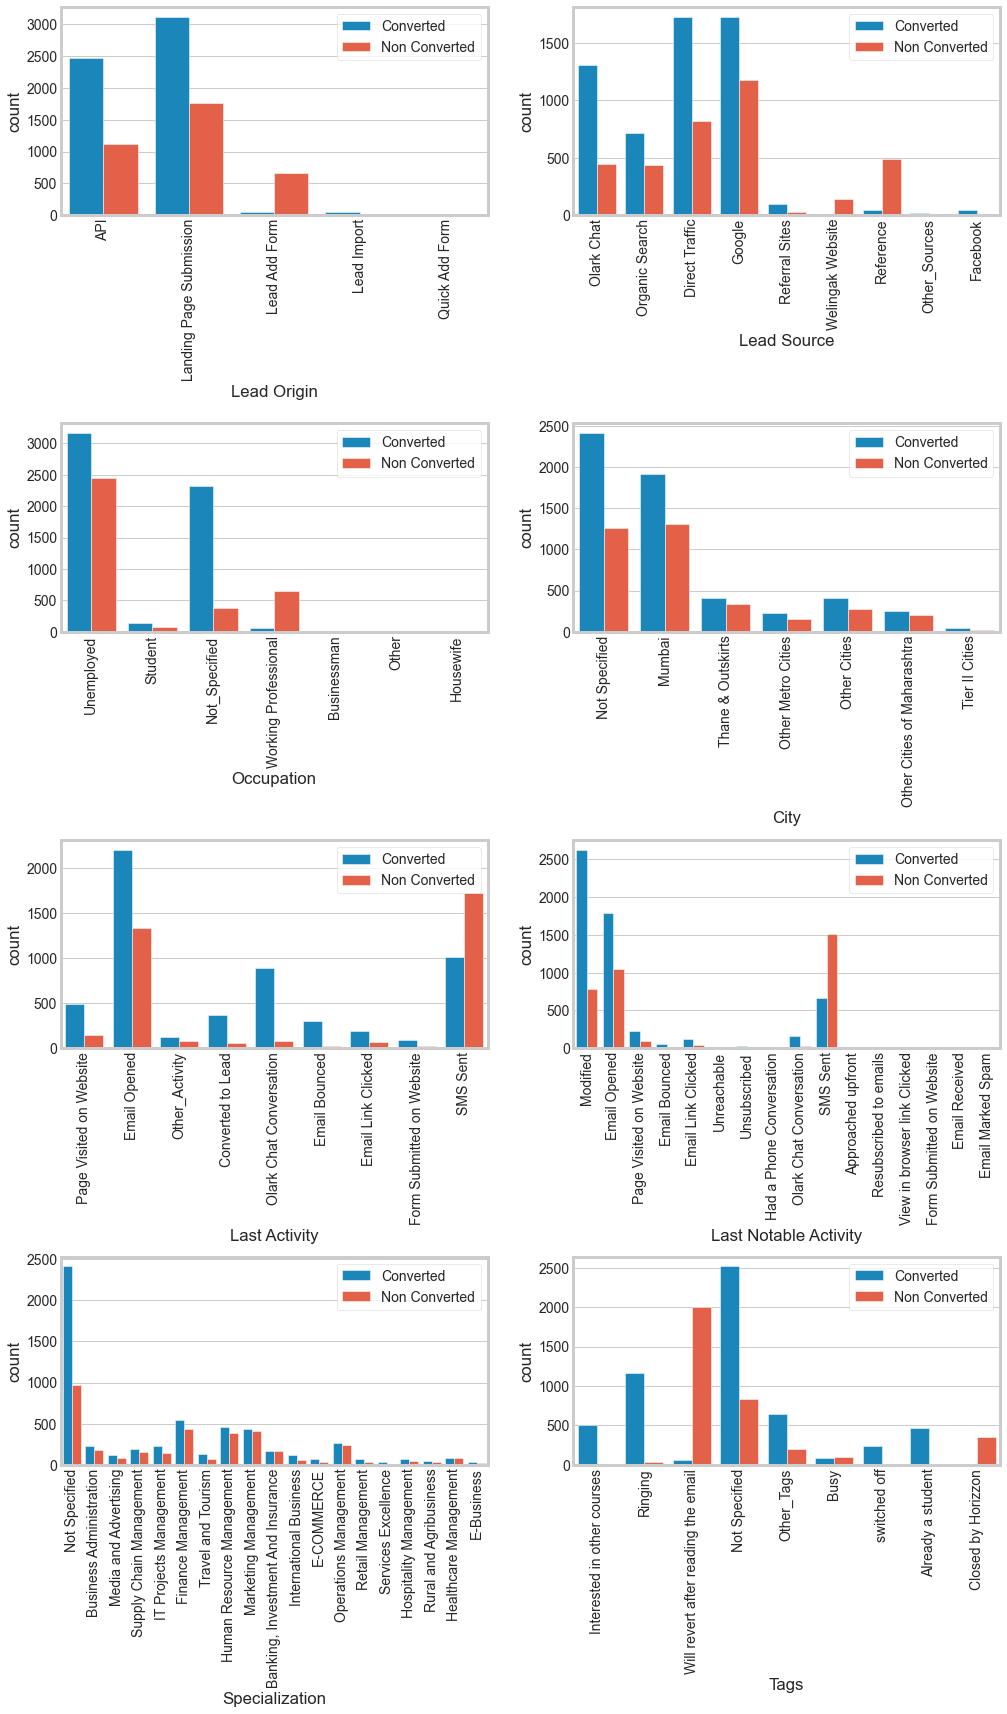

In [72]:
categorical_columns = leads.select_dtypes(include=['object']).columns.tolist()
len(categorical_columns) #8

plt.figure(figsize=(15,25))
plt.subplots_adjust(wspace=.2,hspace= 1 )
for i in enumerate(['Lead Origin','Lead Source','Occupation','City','Last Activity','Last Notable Activity',
                   'Specialization','Tags']):
    plt.subplot(4,2, i[0]+1)
    ax1 = sns.countplot(x = i[1],hue = 'Converted', data = leads)
    ax1.legend(['Converted','Non Converted'],loc = "upper right")
    plt.xticks(rotation=90)
plt.show()

######  Inferences from bivariate categorical plots above

**- Lead Origin - API and Landing page submission form the most number.**

**- Lead Source - More leads are generated from sources like Google, Direct traffic and Olark Chat in comparison to others**

**- Occupation - Unemployed and Not specified the have most leads**

**- Last Activity - Email Opened and SMS sent have the most number of leads**

**- Last Notable Activity - Modfiied, Eamil opened and SMS sent have the most number of leads**
 
**- Specialization - Unspecified leads are more follwoed by leads having specialization as Finance Management and Human resource management**

**- Tags - People tagged as 'Will revert after reading the email' has least convertion rate.**

**- City - Mumbai and Not specified the have most leads**



## 5. Data Preparation

#### 1. Drop the columns generated by sales team 
#### 2. Map variables if required
#### 3. Dummy variables

### Drop the columns generated by sales team

**We have to drop all the columns that do not come from original source by generated by the sales team because ML model should
have columns directly from original source**

In [73]:
columns_created_by_sales_team = ['Tags','Last Activity','Last Notable Activity']
print('Number of columns before dropping sales columns',leads.shape[1])
print()
leads.drop(columns_created_by_sales_team, 1, inplace=True)
print('Number of columns after dropping sales columns',leads.shape[1]) #Should be 9
                

Number of columns before dropping sales columns 12

Number of columns after dropping sales columns 9


### Map variables if required

**Check if any of the categorical columns have only 2 distinct values and map them to 0 and 1 to make it ready  for scaling in the later part**

In [74]:


categorical_columns = leads.select_dtypes(include=['object']).columns.tolist()
for column in categorical_columns:
    print(column,'has', len(leads[column].unique()),'values')
    

Lead Origin has 5 values
Lead Source has 9 values
Specialization has 19 values
Occupation has 7 values
City has 7 values


######  Since none of the columns have only 2 values there is no need to do explicit mapping

###  Dummy Variable Creation

In [75]:
leads.head(1)

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Occupation,City
0,API,Olark Chat,0,0.0,0,0.0,Not Specified,Unemployed,Not Specified


In [76]:
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source','Specialization','Occupation','City']], drop_first=True)
leads = pd.concat([leads, dummy],axis=1)
leads.head(1)

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Occupation,City,Lead Origin_Landing Page Submission,...,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,City_Not Specified,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0.0,0,0.0,Not Specified,Unemployed,Not Specified,0,...,0,0,1,0,1,0,0,0,0,0


In [77]:

# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Lead Origin', 'Lead Source','Specialization','Occupation','City'], axis=1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Converted                                 9240 non-null   int64  
 1   TotalVisits                               9240 non-null   float64
 2   Total Time Spent on Website               9240 non-null   int64  
 3   Page Views Per Visit                      9240 non-null   float64
 4   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 5   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 6   Lead Origin_Lead Import                   9240 non-null   uint8  
 7   Lead Origin_Quick Add Form                9240 non-null   uint8  
 8   Lead Source_Facebook                      9240 non-null   uint8  
 9   Lead Source_Google                        9240 non-null   uint8  
 10  Lead Source_Olark Chat              

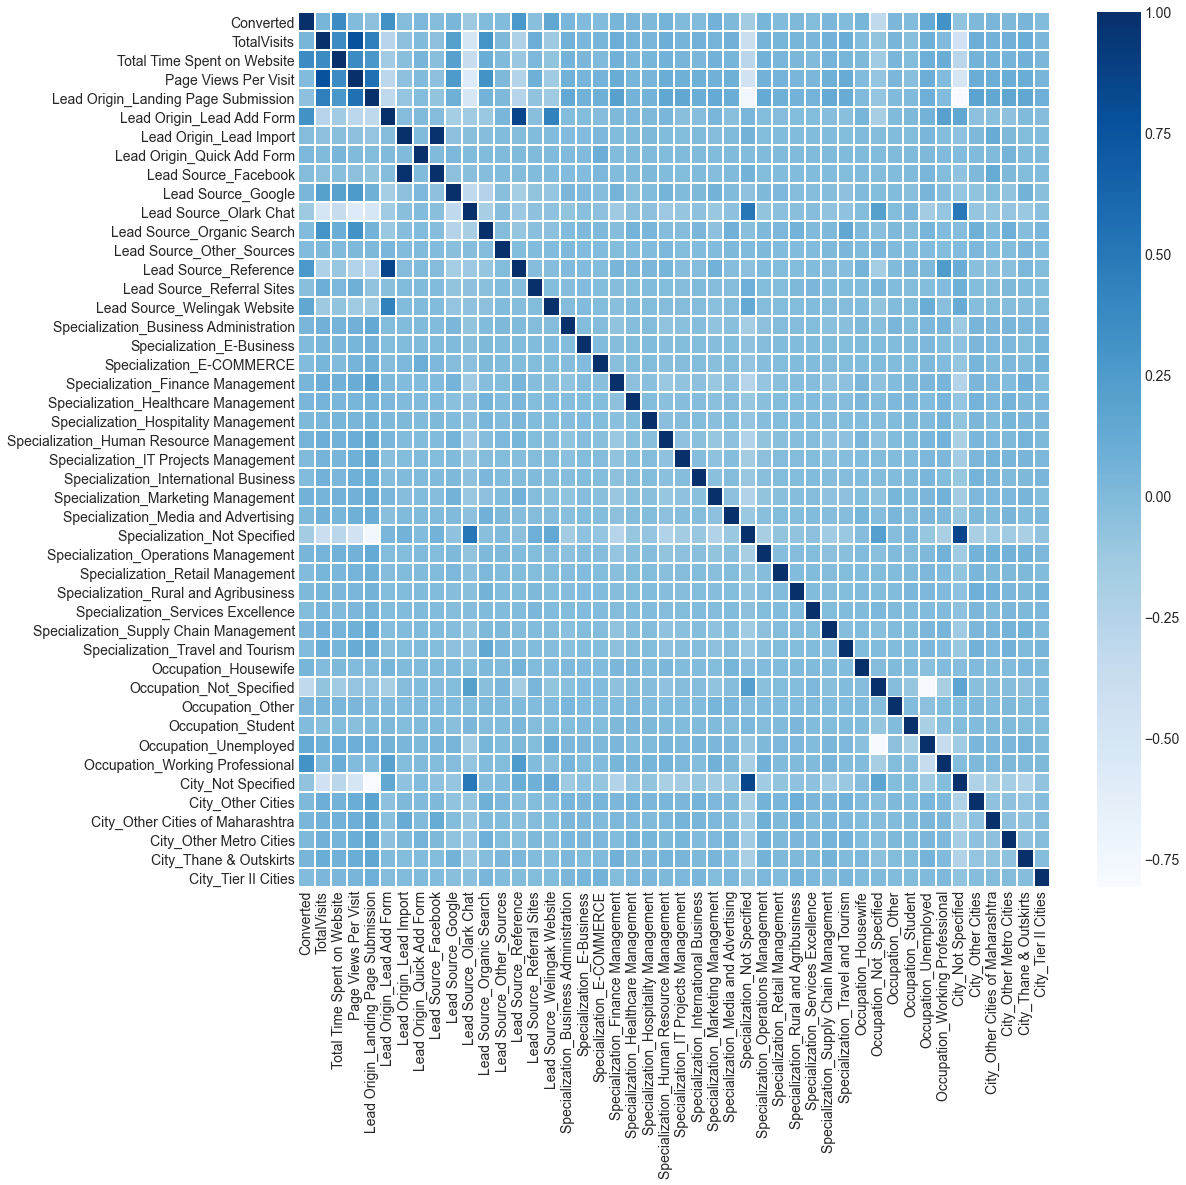

In [78]:
#Heatmap to understand correlations between columns
plt.figure(figsize=[15,15])
sns.heatmap(leads.corr(), cmap="Blues",linewidth =1)
plt.show()

###### Inferences from heatmap (Only for converted column since heatmap is too big to analyze for all)

**- 'Total time spent on the website', 'Lead Origin_Lead Add Form', 'Lead Source_Reference','Occupation_Working Professional' are better positively correlated to 'Converted' variable than others 

## 6. Splitting the Data into Training and Testing Sets

### 6.1 Lets split the data into train and test

In [79]:
from sklearn.model_selection import train_test_split

# We specify thrandom seed so that the train and test data set always have the same rows, respectively
np.random.seed(0)
leads_train_data, leads_test_data = train_test_split(leads, train_size = 0.7, test_size = 0.3, random_state = 100)

### 6.2 Rescaling the Features  - Min-Max scaling 


In [80]:
# lets use min max scaler so that numeric variables are between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [81]:
# define all numeric variables in a list
numeric_columns = leads.select_dtypes(include=np.number).columns.tolist()

#apply scaler on the above variables list
leads_train_data[numeric_columns] = scaler.fit_transform(leads_train_data[numeric_columns])

In [82]:
pd.set_option('display.max_columns', 500) #Setting to max to be able to see all columns

In [83]:
# lets see the top 5 rows in this df after scaling has ben done

leads_train_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Not_Specified,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,City_Not Specified,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
1871,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6795,0.0,0.4,0.214349,0.221667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3516,0.0,0.5,0.046655,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8105,0.0,0.5,0.541373,0.833333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3934,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## 7. Building Logistic Regresion Model


In [84]:
# lets create target variable series  called leads_df_train_target_coulmn which has Converted
leads_df_train_target_coulmn = leads_train_data.pop('Converted')

# lets create independent variables dataframe called leads_df_train_variables_coulmn which has all independent
# variables once Converted is popped.
leads_df_train_coulmns = leads_train_data


###  Step 7.1: Building our initial model using RFE

we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE which is a utility fromsklearn to do recursive feature elimination to select our top 15 variables.

#### Step 6.1.1 RFE
Recursive feature elimination

In [85]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [86]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(leads_df_train_coulmns, leads_df_train_target_coulmn)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(leads_df_train_coulmns, leads_df_train_target_coulmn)

In [87]:
# lets list column name , if column is selected in rfe and its ranking 
#(1 being the best and higher values denoting less desired features according to RFE)
list(zip(leads_df_train_coulmns.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Facebook', False, 17),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 7),
 ('Lead Source_Other_Sources', False, 4),
 ('Lead Source_Reference', False, 18),
 ('Lead Source_Referral Sites', False, 22),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 10),
 ('Specialization_E-Business', False, 13),
 ('Specialization_E-COMMERCE', False, 26),
 ('Specialization_Finance Management', False, 19),
 ('Specialization_Healthcare Management', False, 24),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', False, 11),
 ('Specialization_IT Projects Management'

In [ ]:
# Columns selected by RFE
leads_df_train_columns_rfe = leads_df_train_coulmns.columns[rfe.support_]
col